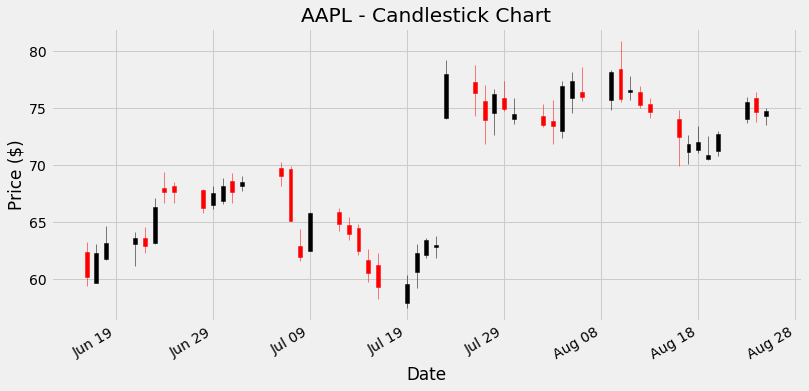

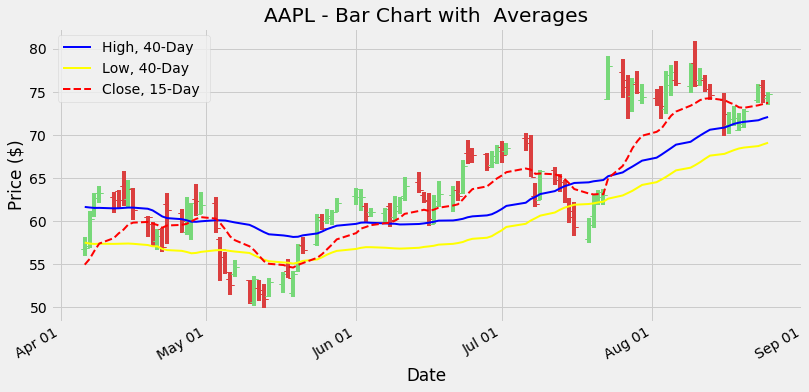

In [3]:
import pandas as pd

import matplotlib.dates as mdates
from mplfinance.original_flavor import plot_day_summary_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.pyplot as plt


datafile = 'C:/Users/sanja/Downloads/Stock List.csv'
data = pd.read_csv(datafile, index_col = 'date')
data.index = pd.to_datetime(data.index)
data


dvalues = data[['open', 'high', 'low', 'close']].values.tolist()
pdates = mdates.date2num(data.index)

ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (12,6))

candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('AAPL - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

fig.autofmt_xdate()

high = data['high'].rolling(40).mean()
low = data['low'].rolling(40).mean()
close = data['close'].ewm(span=15).mean()

fig, ax = plt.subplots(figsize = (12,6))

plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(high[-100:], color = 'blue', linewidth = 2, label='High, 40-Day ')
ax.plot(low[-100:], color = 'yellow', linewidth = 2, label='Low, 40-Day ')
ax.plot(close[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day ')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('AAPL - Bar Chart with  Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()





